In [ ]:
import keras
import tensorflow as tf
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
financial_data = pd.read_csv("financial_data.csv")

financial_data.sample(10)

,Sentence,Sentiment
4252,Business boomed after Ostrom helped plant a sm...,positive
2566,Fortum expects its annual capital expenditure ...,neutral
1052,"HELSINKI ( AFX ) - Shares closed higher , led ...",positive
4666,The Finnish daily Kauppalehti surmises that Fi...,negative
5283,The divested stake represented about 2.7 m sha...,neutral
5236,$SPY Looks like bear traps getting laid faster...,positive
4329,The operating margin came down to 2.4 % from 5...,negative
4281,"AstraZeneca bags another cancer drug deal, thi...",positive
1693,Cramo slipped to a pretax loss of EUR 6.7 mill...,negative
4741,Basware finances the acquisition with a bank l...,neutral


In [3]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5841 non-null   object
 1   Sentiment  5841 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
financial_data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [5]:
financial_data["Sentiment"].value_counts()

Sentiment
neutral     3130
positive    1851
negative     860
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

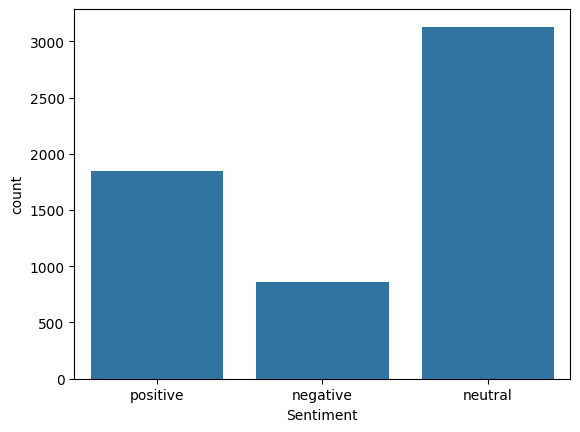

In [6]:
import seaborn as sns
sns.countplot(data = financial_data, x = "Sentiment")

In [7]:
financial_data["WordCount"] = financial_data["Sentence"].apply(lambda x: len(str(x).split(" ")))

financial_data[["Sentence", "WordCount"]].sample(5)

,Sentence,WordCount
4615,CompaniesMeggitt profits hit by weak energy an...,9
1586,Shares will be acquired in accordance with sec...,27
1190,"The inventors are Bylander Johan , Ponten Fred...",12
2385,In 2008 Stockmann earned 3.398 million lats in...,16
2479,Net sales increased to EUR193 .3 m from EUR179...,28


In [8]:
financial_data.groupby("Sentiment")["WordCount"].mean()

Sentiment
negative    19.324419
neutral     22.146006
positive    19.954619
Name: WordCount, dtype: float64

In [9]:
financial_data.groupby("Sentiment")["WordCount"].median()

Sentiment
negative    17.0
neutral     21.0
positive    18.0
Name: WordCount, dtype: float64

<Axes: xlabel='WordCount', ylabel='Count'>

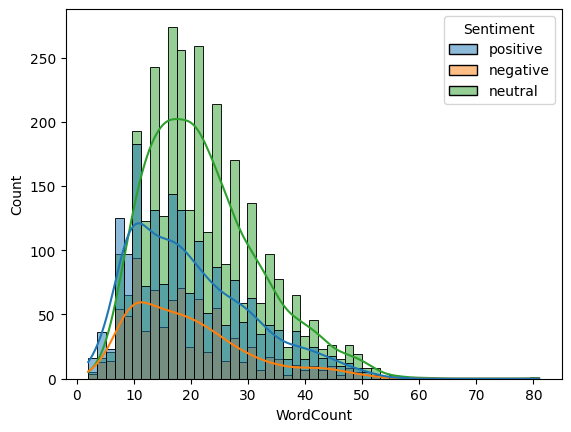

In [10]:
sns.histplot(data = financial_data, x = "WordCount", hue = "Sentiment", kde = True)

<Axes: ylabel='WordCount'>

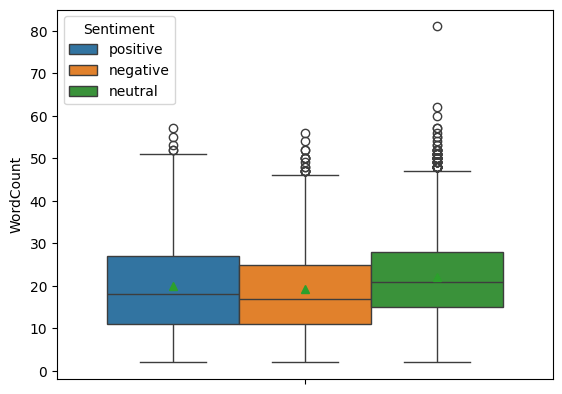

In [11]:
sns.boxplot(data = financial_data, y = "WordCount", hue = "Sentiment", showmeans = True)

In [12]:
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = stopwords.words("english")
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /home/ganesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import string

def preprocess_data(input_data):

    lowercase = tf.strings.lower(input_data)

    stripped_urls = tf.strings.regex_replace(lowercase, r"https?://\S+|www\.\S+", "")

    stripped_symbls = tf.strings.regex_replace(stripped_urls, r"\S*@\S*\s?", "")

    stripped_brckts = tf.strings.regex_replace(stripped_symbls, r"<.*?>+|\[|\]", "")

    stripped_dgts = tf.strings.regex_replace(stripped_brckts, r"\w*\d\w*", "")

    stripped_spcs = tf.strings.regex_replace(stripped_dgts, r"\s+", " ")

    stripped_stpwrds = tf.strings.regex_replace(stripped_spcs, r"\b(?:{})\b".format("|".join(stop_words)), "")

    final_data = tf.strings.regex_replace(stripped_stpwrds ,r"[^a-zA-Z\s]+" ,"")
    
    return final_data

In [14]:
financial_data["NormalizedSentence"] = financial_data["Sentence"].apply(lambda x: preprocess_data(x).numpy().decode("utf-8"))

financial_data.head()

2025-12-05 08:53:28.199625: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


,Sentence,Sentiment,WordCount,NormalizedSentence
0,The GeoSolutions technology will leverage Bene...,positive,32,geosolutions technology leverage benefon gp...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11,esi lows bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,39,last quarter componenta net sales doubled...
3,According to the Finnish-Russian Chamber of Co...,neutral,20,according finnishrussian chamber commerce ...
4,The Swedish buyout firm has sold its remaining...,neutral,23,swedish buyout firm sold remaining percent...


In [15]:
positive_data = financial_data[financial_data["Sentiment"] == "positive"]["NormalizedSentence"]
positive_text = " ".join(positive_data)

negative_data = financial_data[financial_data["Sentiment"] == "negative"]["NormalizedSentence"]
negative_text = " ".join(negative_data)

neutral_data = financial_data[financial_data["Sentiment"] == "neutral"]["NormalizedSentence"]
neutral_text = " ".join(neutral_data)

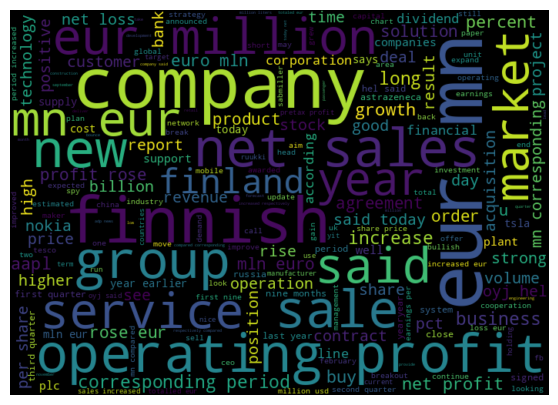

In [16]:
from wordcloud import WordCloud
positive_wordcloud = WordCloud(width = 700, height = 500, random_state=20, max_font_size=100).generate(positive_text)

plt.figure(figsize = (7, 5))
plt.imshow(positive_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

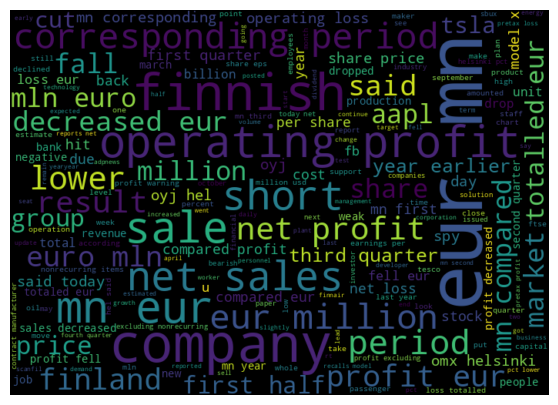

In [17]:
negative_wordcloud = WordCloud(width = 700, height = 500, random_state=20, max_font_size=100).generate(negative_text)

plt.figure(figsize = (7, 5))
plt.imshow(negative_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

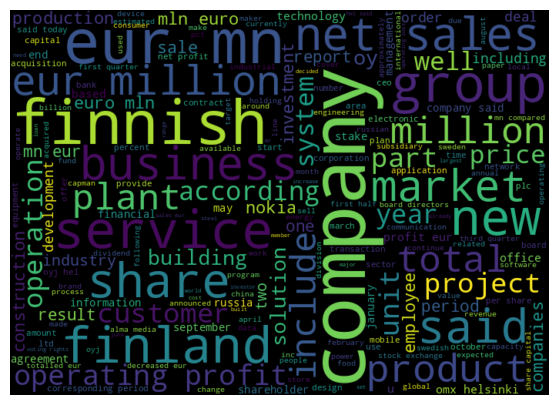

In [18]:
neutral_wordcloud = WordCloud(width = 700, height = 500, random_state=20, max_font_size=100).generate(neutral_text)

plt.figure(figsize = (7, 5))
plt.imshow(neutral_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [19]:
financial_data["Sentiment"] = financial_data["Sentiment"].replace({"positive": 2, "neutral": 1, "negative": 0}).infer_objects(copy=False)
financial_data.sample(5)

/tmp/ipykernel_31164/1391264786.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  financial_data["Sentiment"] = financial_data["Sentiment"].replace({"positive": 2, "neutral": 1, "negative": 0}).infer_objects(copy=False)


,Sentence,Sentiment,WordCount,NormalizedSentence
5186,"Upside moves in the volatile #mining sector, s...",2,20,upside moves volatile mining sector sending ...
3787,The orders also include a few high-power drive...,1,15,orders also include highpower drives cont...
5234,Group net sales in the third quarter of 2007 t...,1,20,group net sales third quarter totaled eur ...
2644,Following the increase the company+óEUR TM s c...,1,20,following increase companyeur tm capital to...
5204,The most significant challengers in the market...,1,12,significant challengers market logset sa...


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(financial_data, test_size = 0.2, random_state = 123, stratify = financial_data["Sentiment"])
x_train, x_val = train_test_split(x_train, test_size = 0.1, random_state = 123, stratify = x_train["Sentiment"])

x_train.shape, x_val.shape, x_test.shape

((4204, 4), (468, 4), (1169, 4))

In [21]:
x_train["Sentiment"].value_counts()

Sentiment
1    2253
2    1332
0     619
Name: count, dtype: int64

In [22]:
x_val["Sentiment"].value_counts()

Sentiment
1    251
2    148
0     69
Name: count, dtype: int64

In [23]:
x_test["Sentiment"].value_counts()

Sentiment
1    626
2    371
0    172
Name: count, dtype: int64

In [24]:
raw_train_ds = tf.data.Dataset.from_tensor_slices((x_train["NormalizedSentence"].values, x_train["Sentiment"].values)).shuffle(1024).batch(128)
raw_val_ds = tf.data.Dataset.from_tensor_slices((x_val["NormalizedSentence"].values, x_val["Sentiment"].values)).batch(128)
raw_test_ds = tf.data.Dataset.from_tensor_slices((x_test["NormalizedSentence"].values, x_test["Sentiment"].values)).batch(128)

len(raw_train_ds), len(raw_val_ds), len(raw_test_ds)

(33, 4, 10)

In [25]:
vocab_size = 10000

count_vectorizer = keras.layers.TextVectorization(
    max_tokens = vocab_size, 
    output_mode = "count", 
    standardize = preprocess_data, 
    ngrams=(1,2)
)

In [26]:
train_txt = raw_train_ds.map(lambda x, y: x)
count_vectorizer.adapt(train_txt)

2025-12-05 08:53:41.152973: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [27]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return count_vectorizer(text), label

In [28]:
import sys

np.set_printoptions(threshold=sys.maxsize)

category_names = ["negative", "neutral", "positive"]
text_batch, label_batch = next(iter(raw_train_ds))
first_sentence, first_label = text_batch[0], label_batch[0]

print("Sentence: ", first_sentence.numpy())
print("Label: ", category_names[first_label.numpy()])

vectorized_text, vectorized_label = vectorize_text(first_sentence, first_label)
print("Vectorized label: ", vectorized_label.numpy())
print("Vectorized sentence: ", vectorized_text.numpy())

Sentence:  b'pretax profit totaled eur  mn    eur  mn  '
Label:  neutral
Vectorized label:  1
Vectorized sentence:  [[0 2 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [29]:
count_vectorizer.get_vocabulary()[0:10]

['[UNK]',
 np.str_('eur'),
 np.str_('company'),
 np.str_('mn'),
 np.str_('eur mn'),
 np.str_('profit'),
 np.str_('sales'),
 np.str_('finnish'),
 np.str_('said'),
 np.str_('net')]

In [30]:
len(count_vectorizer.get_vocabulary())

10000

In [31]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
dnn_model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (vocab_size,)),
    keras.layers.Dense(64, activation = "tanh"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation = "tanh"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3, activation = "softmax")
])

/home/ganesh/DevApps/Learn/ML/sentiment-analysis/myenv/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [34]:
dnn_model_compile = dnn_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    #optimizer = "adam", 
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    #optimizer = keras.optimizers.Adam(learning_rate=0.003),
    metrics = ["accuracy"],
)
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,243 (2.45 MB)

 Trainable params: 642,243 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = dnn_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10


/home/ganesh/DevApps/Learn/ML/sentiment-analysis/myenv/lib/python3.13/site-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5714 - loss: 0.9155 - val_accuracy: 0.6325 - val_loss: 0.8315
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7733 - loss: 0.5986 - val_accuracy: 0.6731 - val_loss: 0.7405
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8440 - loss: 0.3862 - val_accuracy: 0.6859 - val_loss: 0.7555
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8839 - loss: 0.2725 - val_accuracy: 0.6667 - val_loss: 0.8397
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8963 - loss: 0.2168 - val_accuracy: 0.6453 - val_loss: 0.9274
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9075 - loss: 0.1839 - val_accuracy: 0.6496 - val_loss: 0.9953
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9146 - loss: 0.1636 - val_accuracy: 0.6389 - val_loss: 1.0546
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9167 - loss: 0.1513 - val_accuracy: 0.6325 - val_loss: 1.

In [36]:
loss, accuracy = dnn_model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)   

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6245 - loss: 1.3353
Loss:  1.3352922201156616
Accuracy:  0.6244653463363647


In [37]:
history_dict = history.history 
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

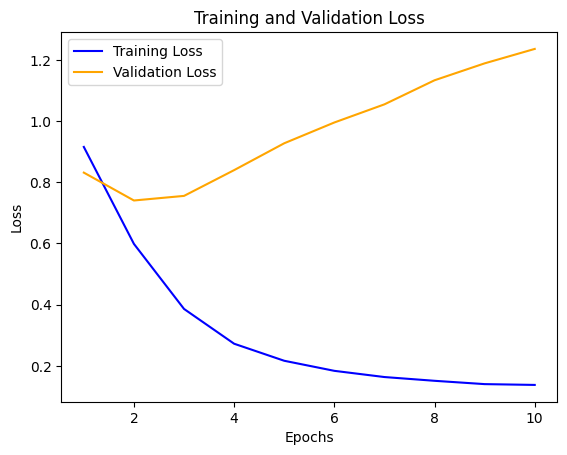

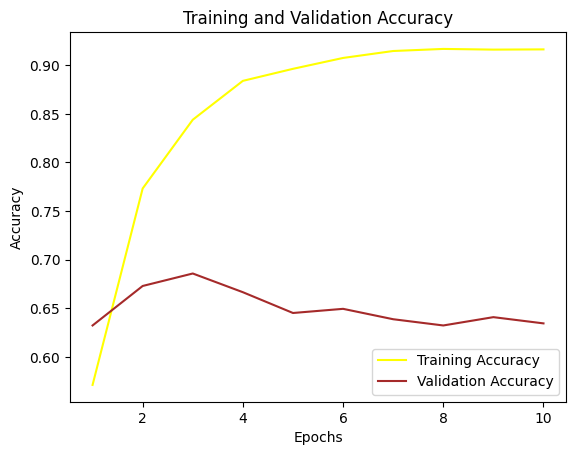

In [38]:
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, loss, color="blue", label = "Training Loss")
plt.plot(epochs, val_loss, color="orange", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(epochs, accuracy, color="yellow", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, color="brown", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [39]:
export_model = keras.Sequential([
    count_vectorizer,
    dnn_model
])

export_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"],
)

loss, accuracy = export_model.evaluate(raw_test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)  

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6245 - loss: 1.3353
Loss:  1.3352922201156616
Accuracy:  0.6244653463363647


In [40]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

predictions = export_model.predict(x_test["NormalizedSentence"].values)

y_pred = np.argmax(predictions, axis=1)
y_test = x_test["Sentiment"].values

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy from numpy: ", accuracy)    

f1 = f1_score(y_test, y_pred, average=None)

precision = precision_score(y_test, y_pred, average = None)

recall = recall_score(y_test, y_pred, average=None)

report = classification_report(y_test, y_pred)

print(report)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Accuracy from numpy:  0.6244653550042771
              precision    recall  f1-score   support

           0       0.22      0.18      0.20       172
           1       0.68      0.73      0.70       626
           2       0.68      0.66      0.67       371

    accuracy                           0.62      1169
   macro avg       0.53      0.52      0.52      1169
weighted avg       0.61      0.62      0.62      1169



In [41]:
vocab_size = 10000

tf_idf_vectorizer = keras.layers.TextVectorization(
    max_tokens = vocab_size, 
    output_mode = "tf_idf", 
    standardize = preprocess_data, 
    ngrams=(1,2)
)
tf_idf_vectorizer.adapt(train_txt)

2025-12-05 08:54:11.630665: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
tf_idf_vectorizer.get_vocabulary()[0:10]

['[UNK]',
 np.str_('eur'),
 np.str_('company'),
 np.str_('mn'),
 np.str_('eur mn'),
 np.str_('profit'),
 np.str_('sales'),
 np.str_('finnish'),
 np.str_('said'),
 np.str_('net')]

In [43]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return tf_idf_vectorizer(text), label

In [44]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [45]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [46]:
dnn_model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (vocab_size,)),
    keras.layers.Dense(64, activation = "tanh"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation = "tanh"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3)
])

dnn_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    #optimizer = keras.optimizers.Adam(learning_rate = 0.00001),
    optimizer = keras.optimizers.Adam(learning_rate = 0.00003),
    metrics = ["accuracy"]
)   

history = dnn_model.fit(
    train_ds,
    epochs = 40,
    validation_data = val_ds
)

Epoch 1/40


/home/ganesh/DevApps/Learn/ML/sentiment-analysis/myenv/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3644 - loss: 1.1201 - val_accuracy: 0.4167 - val_loss: 1.0381
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4781 - loss: 1.0117 - val_accuracy: 0.5449 - val_loss: 0.9702
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5252 - loss: 0.9573 - val_accuracy: 0.5791 - val_loss: 0.9395
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5599 - loss: 0.9177 - val_accuracy: 0.5705 - val_loss: 0.9257
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5878 - loss: 0.8905 - val_accuracy: 0.5791 - val_loss: 0.9168
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5990 - loss: 0.8701 - val_accuracy: 0.5855 - val_loss: 0.9098
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6242 - loss: 0.8474 - val_accuracy: 0.6068 - val_loss: 0.9031
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6389 - loss: 0.8265 - val_accuracy: 0.6154 - val_loss: 0.

In [47]:
loss, accuracy = dnn_model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)       

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6245 - loss: 0.8707
Loss:  0.8706546425819397
Accuracy:  0.6244653463363647


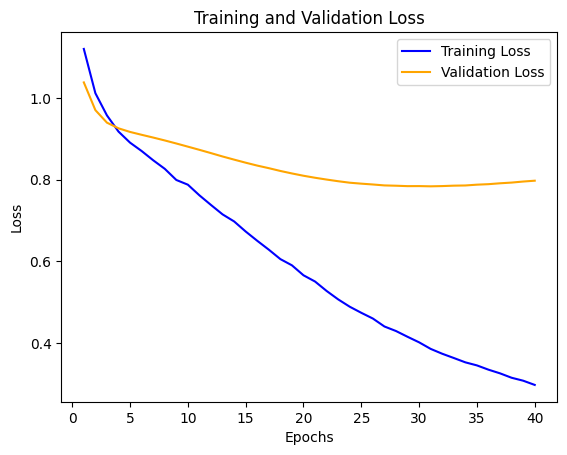

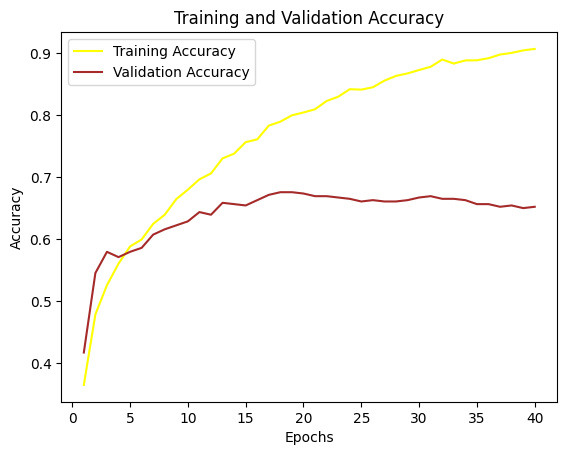

In [48]:
history_dict = history.history 
history_dict.keys() 

accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]     

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, color="blue", label = "Training Loss")
plt.plot(epochs, val_loss, color="orange", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(epochs, accuracy, color="yellow", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, color="brown", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")   
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
export_model = keras.Sequential([
    tf_idf_vectorizer,
    dnn_model
])  

export_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.00003),
    metrics = ["accuracy"]
)

loss, accuracy = export_model.evaluate(raw_test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6245 - loss: 0.8707
Loss:  0.8706546425819397
Accuracy:  0.6244653463363647


In [50]:
vocab_size = 10000
seq_length = 250

text_vectorizer = keras.layers.TextVectorization(
    max_tokens = vocab_size,
    output_mode = "int",
    output_sequence_length = seq_length,
    standardize=preprocess_data
)

train_txt = raw_train_ds.map(lambda x, y: x)
text_vectorizer.adapt(train_txt)

In [51]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return text_vectorizer(text), label

In [52]:
train_ds = raw_train_ds.map(vectorize_text).cache().prefetch(buffer_size = AUTOTUNE)
val_ds = raw_val_ds.map(vectorize_text).cache().prefetch(buffer_size = AUTOTUNE)
test_ds = raw_test_ds.map(vectorize_text).cache().prefetch(buffer_size = AUTOTUNE)

In [53]:
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor = "val_accuracy",
        patience = 10,
        restore_best_weights = True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor = "val_accuracy",
        factor = 0.5,
        patience = 5,
        min_lr = 0.00001
    )
]

In [54]:
embedding_dim = 64

model = keras.Sequential([
    keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = seq_length),
    keras.layers.Dropout(0.2),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation = "tanh"),
    keras.layers.Dropout(0.1),            
    keras.layers.Dense(32, activation = "tanh"),    
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3)
])

/home/ganesh/DevApps/Learn/ML/sentiment-analysis/myenv/lib/python3.13/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)   

history = model.fit(
    train_ds,
    epochs = 50,
    validation_data = val_ds,
    callbacks = callback_list
)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5324 - loss: 0.9875 - val_accuracy: 0.5363 - val_loss: 0.9818 - learning_rate: 0.0010
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5357 - loss: 0.9862 - val_accuracy: 0.5363 - val_loss: 0.9830 - learning_rate: 0.0010
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5362 - loss: 0.9830 - val_accuracy: 0.5363 - val_loss: 0.9821 - learning_rate: 0.0010
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5357 - loss: 0.9823 - val_accuracy: 0.5363 - val_loss: 0.9821 - learning_rate: 0.0010
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5359 - loss: 0.9830 - val_accuracy: 0.5363 - val_loss: 0.9819 - learning_rate: 0.0010
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5359 - loss: 0.9817 - val_accuracy: 0.5363 - val_loss: 0.9811 - learning_rate: 0.0010
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5359 - loss: 0.9798 - val_acc

In [57]:
loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)       
print("Accuracy: ", accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5355 - loss: 0.9814
Loss:  0.9813743233680725
Accuracy:  0.5355004072189331


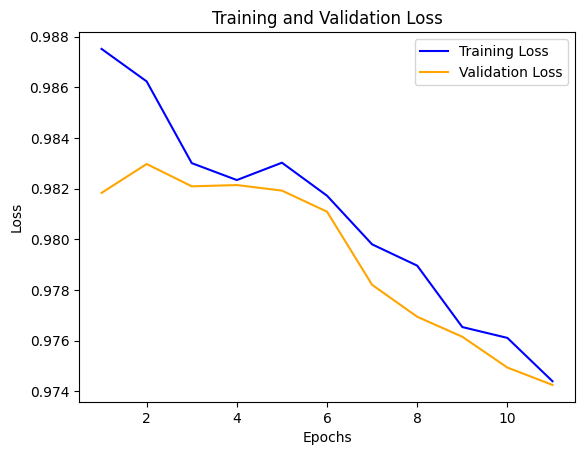

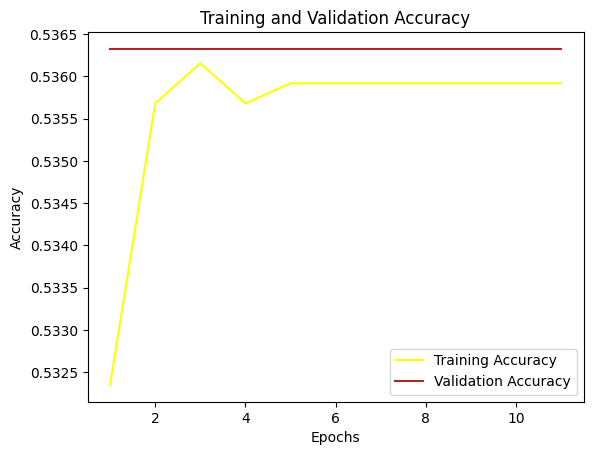

In [58]:
history_dict = history.history 
history_dict.keys() 

accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"] 

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, color="blue", label = "Training Loss")
plt.plot(epochs, val_loss, color="orange", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(epochs, accuracy, color="yellow", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, color="brown", label = "Validation Accuracy")        
plt.title("Training and Validation Accuracy")   
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [59]:
embedding_dim = 128

rnn_model = keras.Sequential([
    keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = seq_length),
    keras.layers.SimpleRNN(128, return_sequences = True),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(3, activation = "softmax")
])

In [60]:
rnn_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

In [61]:
history = rnn_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds, callbacks = callback_list
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 635ms/step - accuracy: 0.5274 - loss: 0.9815 - val_accuracy: 0.5385 - val_loss: 0.9536 - learning_rate: 0.0010
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 650ms/step - accuracy: 0.6549 - loss: 0.7972 - val_accuracy: 0.6389 - val_loss: 0.8667 - learning_rate: 0.0010
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 623ms/step - accuracy: 0.7824 - loss: 0.5402 - val_accuracy: 0.6389 - val_loss: 0.8561 - learning_rate: 0.0010
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 676ms/step - accuracy: 0.8694 - loss: 0.3475 - val_accuracy: 0.6218 - val_loss: 1.0494 - learning_rate: 0.0010
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 705ms/step - accuracy: 0.8906 - loss: 0.2638 - val_accuracy: 0.6175 - val_loss: 0.9084 - learning_rate: 0.0010
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 548ms/step - accuracy: 0.8875 - loss: 0.2820 - val_accuracy: 0.5983 - val_loss: 0.9931 - learning_rate: 0.0010
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 657ms/step - accuracy: 0.8977 - loss: 0.

In [62]:
loss, accuracy = rnn_model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.6210 - loss: 0.8731
Loss:  0.873058021068573
Accuracy:  0.6210436224937439


In [63]:
embedding_dim = 128

lstm_model = keras.Sequential([
    keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = seq_length),
    keras.layers.SpatialDropout1D(0.2),
    keras.layers.LSTM(128, dropout = 0.5, recurrent_dropout = 0.2, return_sequences = True),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation = "tanh"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3, activation = "softmax")
])

lstm_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

history = lstm_model.fit(
    train_ds,
    epochs = 20,    
    validation_data = val_ds,
    callbacks = callback_list
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.5309 - loss: 0.9936 - val_accuracy: 0.5363 - val_loss: 0.9773 - learning_rate: 0.0010
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.5364 - loss: 0.9704 - val_accuracy: 0.5406 - val_loss: 0.9332 - learning_rate: 0.0010
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6501 - loss: 0.8046 - val_accuracy: 0.6432 - val_loss: 0.8134 - learning_rate: 0.0010
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7762 - loss: 0.5499 - val_accuracy: 0.6709 - val_loss: 0.8161 - learning_rate: 0.0010
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8409 - loss: 0.3981 - val_accuracy: 0.6667 - val_loss: 0.8471 - learning_rate: 0.0010
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8711 - loss: 0.2989 - val_accuracy: 0.6474 - val_loss: 0.9217 - learning_rate: 0.0010
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.8908 - loss: 0.2375 - val_accuracy

In [64]:
loss, accuracy = lstm_model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 598ms/step - accuracy: 0.6536 - loss: 0.8979
Loss:  0.8978855013847351
Accuracy:  0.6535500288009644


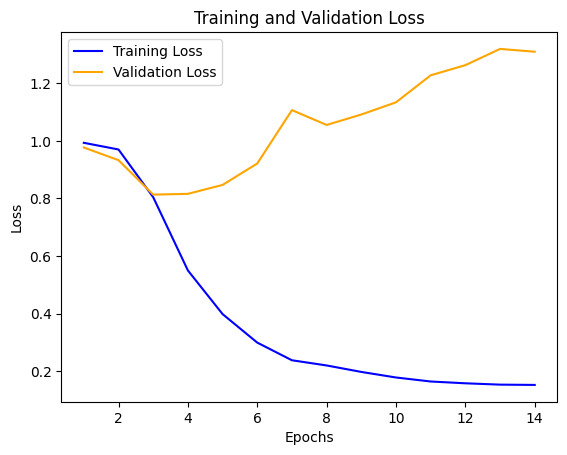

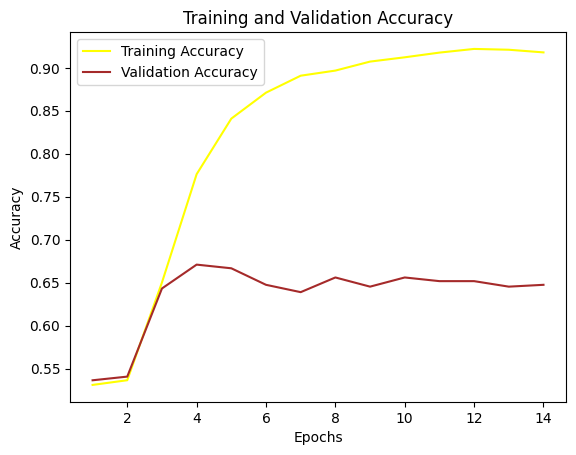

In [65]:
history_dict = history.history  
history_dict.keys()

accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
loss = history_dict["loss"] 
val_loss = history_dict["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, color="blue", label = "Training Loss")
plt.plot(epochs, val_loss, color="orange", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, accuracy, color="yellow", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, color="brown", label = "Validation Accuracy")    
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
export_model = keras.Sequential([
    text_vectorizer,
    lstm_model
])

export_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

In [67]:
loss, accuracy = export_model.evaluate(raw_test_ds)
print("Loss: ", loss)       
print("Accuracy: ", accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.6536 - loss: 0.8979
Loss:  0.8978855013847351
Accuracy:  0.6535500288009644


In [68]:
financial_examples = [
    "A sudden market downturn wiped out substantial gains and left my retirement portfolio seriously underfunded.",
    "After an unexpectedly strong quarter, the company's stock rallied as analysts revised their earnings outlook upward.",
    "Loan approval was delayed when the bank requested additional collateral, creating uncertainty for the borrower."
]

predictions = export_model.predict(tf.convert_to_tensor(financial_examples))

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


array([[0.18195748, 0.71404046, 0.10400209],
       [0.16322799, 0.05126236, 0.7855096 ],
       [0.05691761, 0.93222725, 0.01085509]], dtype=float32)

In [69]:
financial_examples = [
    "A sudden market downturn wiped out substantial gains and left my retirement portfolio seriously underfunded.",
    "After an unexpectedly strong quarter, the company's stock rallied as analysts revised their earnings outlook upward.",
    "Loan approval was delayed when the bank requested additional collateral, creating uncertainty for the borrower."
]

predictions = export_model.predict(tf.convert_to_tensor(financial_examples))

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[0.18195748, 0.71404046, 0.10400209],
       [0.16322799, 0.05126236, 0.7855096 ],
       [0.05691761, 0.93222725, 0.01085509]], dtype=float32)